## 1- Import libraries

In [3]:
import sys
import tensorflow as tf
import numpy as np
%config InlineBackend.figure_format = 'retina'

# 2- Load dataset

In [4]:
# MNIST 데이터셋 불러오기
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

# shape 확인하기
print(X_train.shape) # 28 x 28의 이미지가 60,000장
print(Y_train.shape) ## [ 5, 1, 2, 3, 4, 4,   .... ]
print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (X_test.shape[0]))

(60000, 28, 28)
(60000,)
학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


5


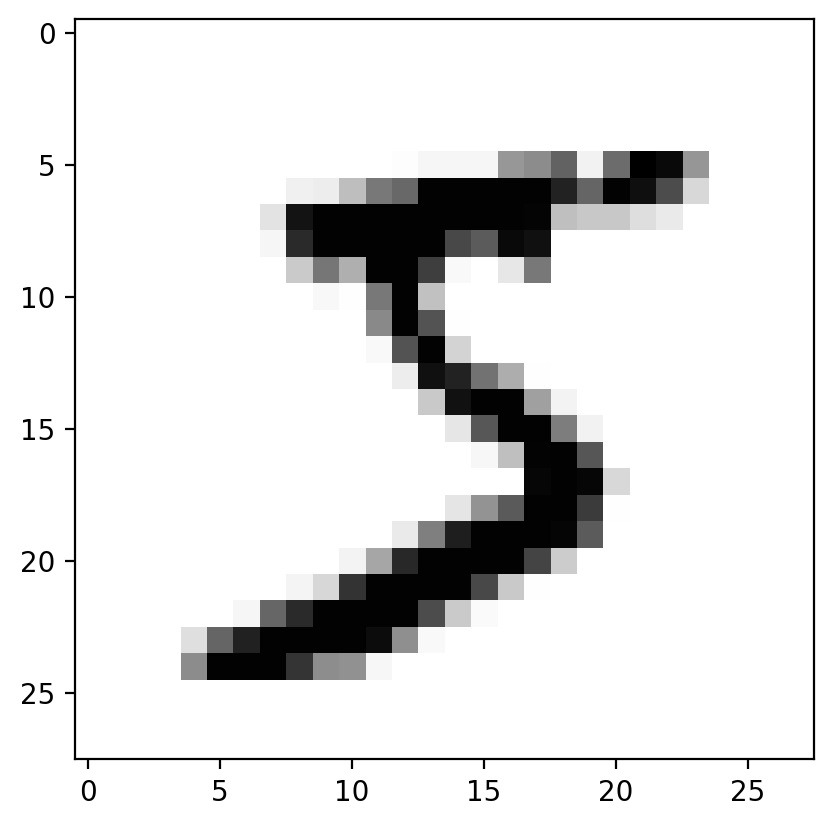

In [5]:
# MNIST 데이터를 시각화하기 
import matplotlib.pyplot as plt
print(Y_train[0])
plt.imshow(X_train[0], cmap='Greys') # 흑백 이미지로 확인
plt.show()

In [6]:
# 데이터를 직접 들여다보기
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%d\t' % i)
    sys.stdout.write('\n')

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


# 3- Reshape & onehot vector

In [7]:
# MLP 구조에 적절한 input의 형태로 변형하기
## reshape()을 사용하여 2차원의 데이터를 1차원으로 변형
## 1차원으로 변형함과 동시에 Normalization
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') # 28 x 28= 784
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32')

In [8]:
# Q. reshape한 X_train과 X_test의 shape을 다시 확인해 보세요.
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [9]:
# Label 값을 One-hot encoding 하기 
# Multi-Class Classfication이므로 keras.utils.to_categorical을 사용
Y_train = tf.keras.utils.to_categorical(Y_train)
Y_test = tf.keras.utils.to_categorical(Y_test)
print(Y_train.shape)
print(Y_test.shape)

(60000, 10)
(10000, 10)


In [10]:
print(Y_test)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [11]:
print(Y_train.shape)
print(Y_test.shape)
print(Y_train[0])

(60000, 10)
(10000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [12]:
# Set numpy to print all elements of arrays
np.set_printoptions(threshold=np.inf)

print(Y_test)

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0.

# 4- Design model

In [35]:
# 모델 설계하기 
input_layer = tf.keras.layers.Input(shape=(784,)) # input layer, input의 사이즈에 맞게 shape을 지정하는 것이 중요

x = tf.keras.layers.Dense(128, activation='relu')(input_layer) # hidden layer 1, 512개의 perceptron으로 구성된 fully connted layer, activation 함수는 relu
x = tf.keras.layers.Dense(128, activation='relu')(x) # hidden layer 2

x = tf.keras.layers.Dense(128, activation='sigmoid')(x) # hidden layer 2

# 분류해야 하는 class 0~9 (10개) -> 따라서 최종 layer의 perceptron은 10개
out_layer= tf.keras.layers.Dense(10, activation='softmax')(x)

model = tf.keras.Model(inputs=[input_layer], outputs=[out_layer])

model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_7 (Dense)             (None, 128)               100480    
                                                                 
 dense_8 (Dense)             (None, 128)               16512     
                                                                 
 dense_9 (Dense)             (None, 128)               16512     
                                                                 
 dense_10 (Dense)            (None, 10)                1290      
                                                                 
Total params: 134794 (526.54 KB)
Trainable params: 134794 (526.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# 5- Complie

In [25]:
loss=tf.keras.losses.categorical_crossentropy
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
metric=tf.keras.metrics.categorical_accuracy
model.compile(loss = loss,
              optimizer = optimizer,
              metrics = [metric])

# 6- Training

In [26]:
# validation_data 옵션으로 테스트 데이터만 넣어주어서 검증 데이터 분류가 가능
history = model.fit(X_train, Y_train, validation_split=0.3, epochs=30, batch_size=2000, verbose=1)
print(history.history.keys())

Epoch 1/30
 9/21 [===========>..................] - ETA: 0s - loss: 182.2811 - categorical_accuracy: 0.0760

2024-03-12 11:35:45.021346: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


21/21 [==============================] - 1s 23ms/step - loss: 217.8538 - categorical_accuracy: 0.0987 - val_loss: 251.8467 - val_categorical_accuracy: 0.1227
Epoch 2/30
21/21 [==============================] - 0s 18ms/step - loss: 258.7905 - categorical_accuracy: 0.1395 - val_loss: 248.3884 - val_categorical_accuracy: 0.1805
Epoch 3/30
21/21 [==============================] - 0s 18ms/step - loss: 210.1889 - categorical_accuracy: 0.2055 - val_loss: 173.3748 - val_categorical_accuracy: 0.2491
Epoch 4/30
21/21 [==============================] - 0s 19ms/step - loss: 138.6655 - categorical_accuracy: 0.2855 - val_loss: 95.6141 - val_categorical_accuracy: 0.2946
Epoch 5/30
21/21 [==============================] - 0s 18ms/step - loss: 76.6031 - categorical_accuracy: 0.3105 - val_loss: 60.2438 - val_categorical_accuracy: 0.3354
Epoch 6/30
21/21 [==============================] - 0s 19ms/step - loss: 57.0389 - categorical_accuracy: 0.3378 - val_loss: 53.2259 - val_categorical_accuracy: 0.3727
Ep

In [27]:
loss = history.history['loss']
print(loss)

[217.85379028320312, 258.79046630859375, 210.18894958496094, 138.66546630859375, 76.60310363769531, 57.0389404296875, 52.33380889892578, 48.578155517578125, 46.35987091064453, 44.83537292480469, 43.07307815551758, 43.84333038330078, 46.04433059692383, 45.714969635009766, 45.21021270751953, 43.982975006103516, 39.51862335205078, 33.662864685058594, 30.6423282623291, 30.815229415893555, 27.309898376464844, 24.60088348388672, 22.468610763549805, 21.086536407470703, 20.726329803466797, 20.371583938598633, 19.952823638916016, 19.784231185913086, 19.419153213500977, 18.849788665771484]


In [28]:
val_loss = history.history['val_loss']
print(val_loss)

[251.84669494628906, 248.38844299316406, 173.37477111816406, 95.61405944824219, 60.243751525878906, 53.225868225097656, 48.335758209228516, 44.114288330078125, 43.081512451171875, 41.924678802490234, 39.832435607910156, 42.57358169555664, 45.27770233154297, 42.440650939941406, 44.426055908203125, 37.904605865478516, 29.75478172302246, 29.16115951538086, 27.692344665527344, 27.567750930786133, 22.67076301574707, 22.870716094970703, 21.0466251373291, 20.265670776367188, 19.976032257080078, 19.189199447631836, 18.924335479736328, 19.166664123535156, 18.412351608276367, 17.58671760559082]


# 7- Evaluation

In [29]:
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

313/313 [==============================] - 4s 11ms/step - loss: 17.3107 - categorical_accuracy: 0.7631

 Test Accuracy: 0.7631


In [30]:
def show_history_c(history):
    history_dict = history.history

    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)
    fig = plt.figure(figsize=(15, 5))

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs, loss, 'b-', marker='.', label='train_loss')
    ax1.plot(epochs, val_loss, 'r-', marker='.', label='val_loss')
    ax1.set_title('Train and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()

    accuracy = history_dict['categorical_accuracy']
    val_accuracy = history_dict['val_categorical_accuracy']

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs, accuracy, 'b-', marker='.', label='train_accuracy')
    ax2.plot(epochs, val_accuracy, 'r-', marker='.', label='val_categorical_accuracy')
    ax2.set_title('Train and Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.grid()
    ax2.legend()

    plt.show()
    # dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])

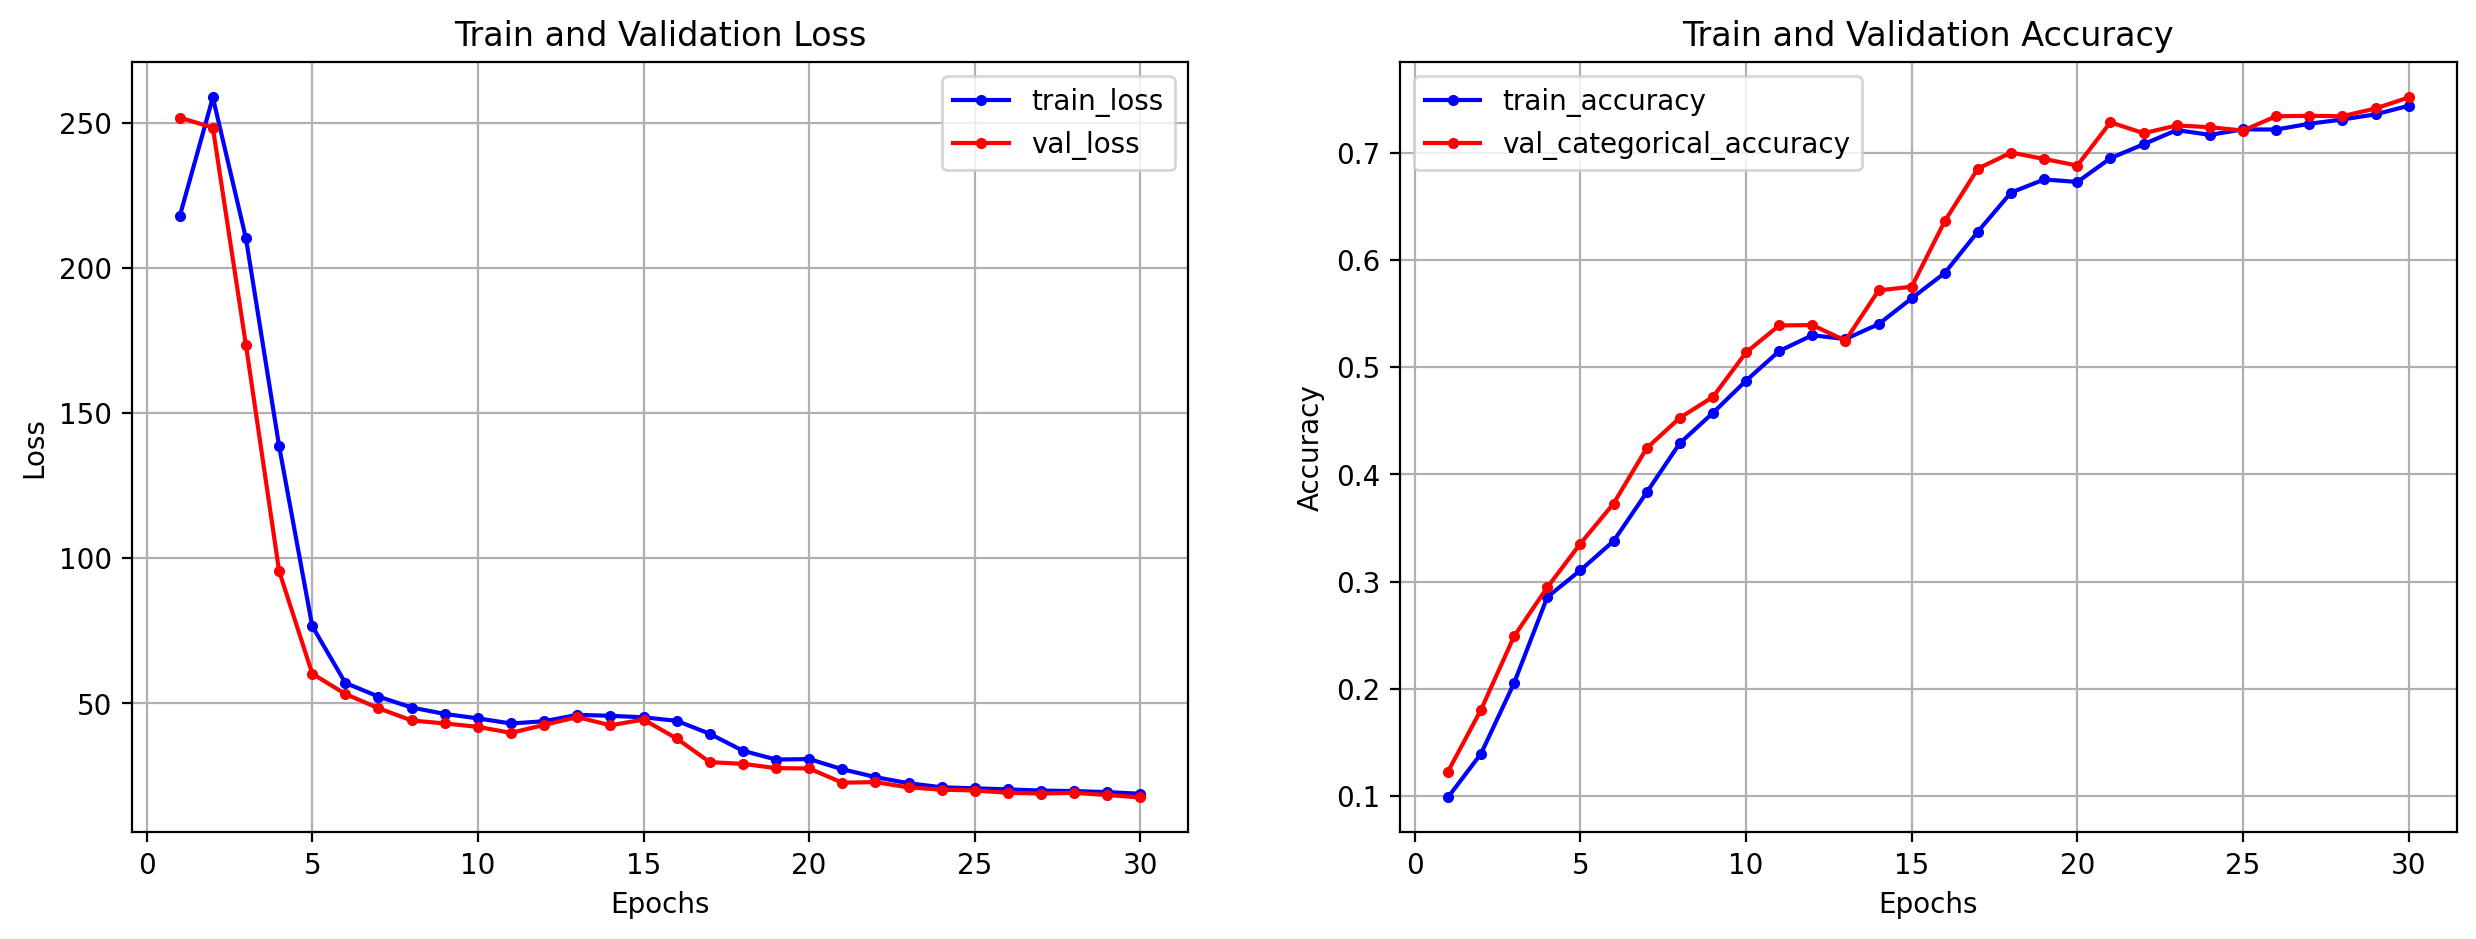

In [31]:
show_history_c(history)

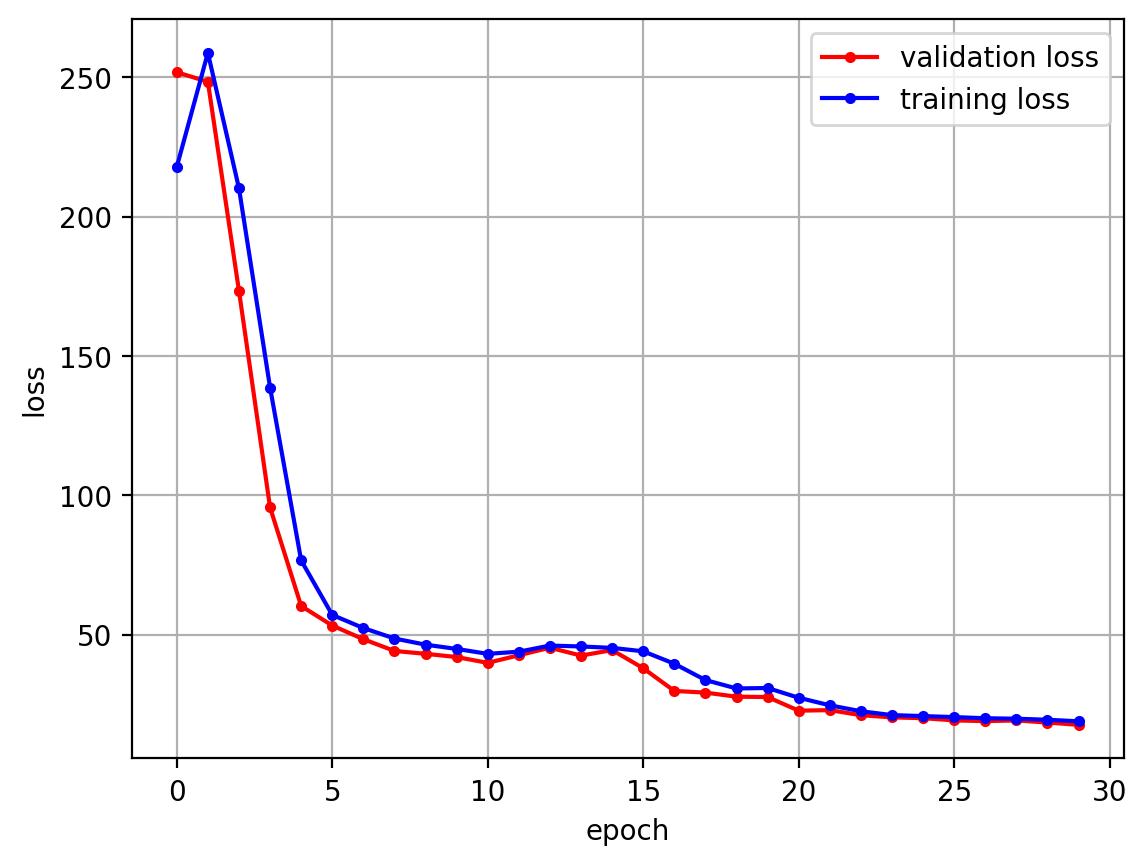

In [32]:
# 그래프로 표현
x_len = np.arange(len(val_loss))
plt.plot(x_len, val_loss, marker='.', c="red", label='validation loss')
plt.plot(x_len, loss, marker='.', c="blue", label='training loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
# plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# 8- Data modification and MLP's limitation

In [33]:
# OpenCV 모듈 불러오기
import cv2

In [34]:
# MNIST 데이터셋 불러오기
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

# shape 확인하기
print(X_train.shape) # 28 x 28의 이미지가 60,000장
print(Y_train.shape) ## [ 5, 1, 2, 3, 4, 4,   .... ]
print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (X_test.shape[0]))

(60000, 28, 28)
(60000,)
학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


0


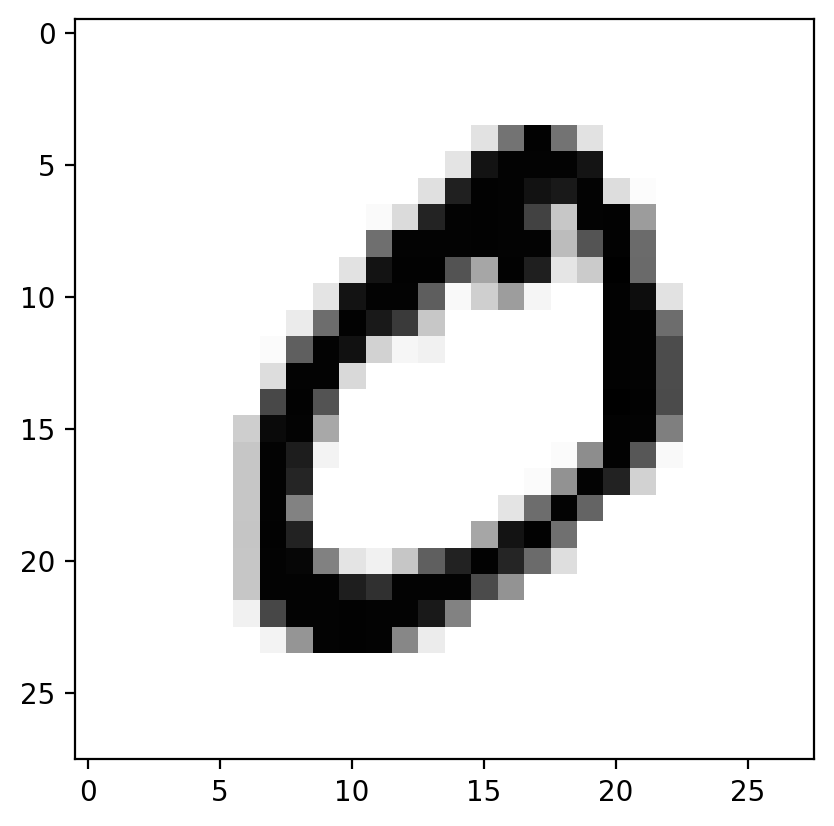

In [22]:
# Q. MNIST 데이터가 어떻게 생겼는지 확인해 봅시다.
# MNIST 데이터를 시각화하기 
import matplotlib.pyplot as plt
print(Y_train[1])
plt.imshow(X_train[1], cmap='Greys') # 흑백 이미지로 확인
plt.show()

In [23]:
# 이미지 회전 변환 메트릭스 구하기 
M= cv2.getRotationMatrix2D((20, 25), 20, 1)  ## 회전 변환 Matrix 생성

# 이미지 이동 변환 메트릭스 구하기
M[0, 2] = M[0, 2] + 3
M[1, 2] = M[1, 2] + 3

# 이미지 변환 메트릭스 적용
test_image = cv2.warpAffine(X_train[5], M, (28, 28))  ## image에 matrix 곱

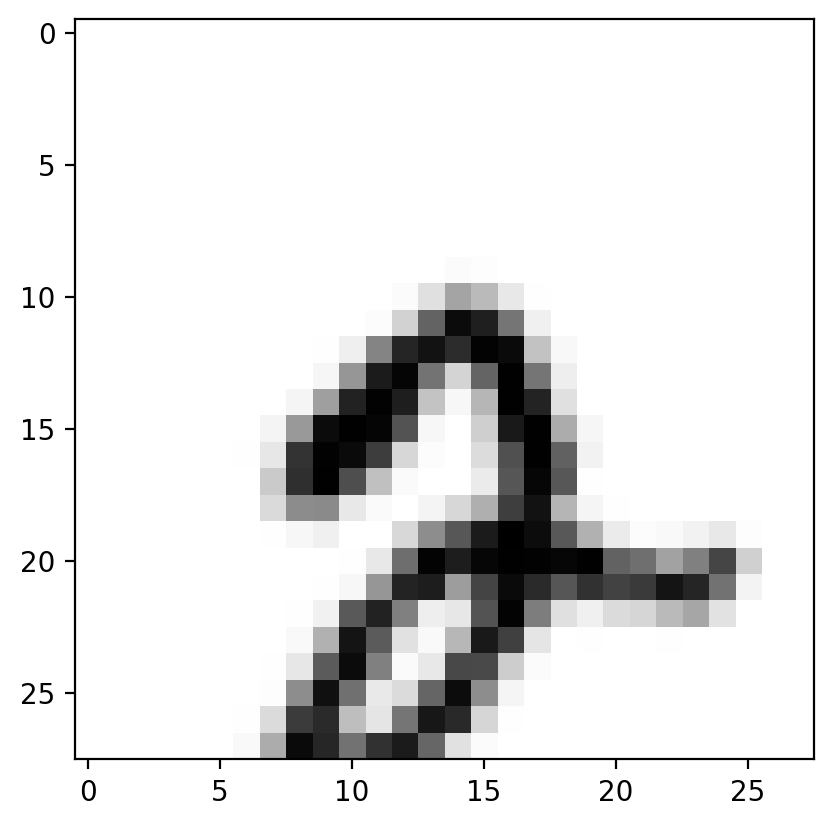

In [24]:
plt.imshow(test_image, cmap = 'Greys')

In [25]:
test_image_reshape = test_image.reshape(1, 784).astype('float32')

In [26]:
Y_prediction = model.predict(test_image_reshape)

1/1 [==============================] - 0s 301ms/step


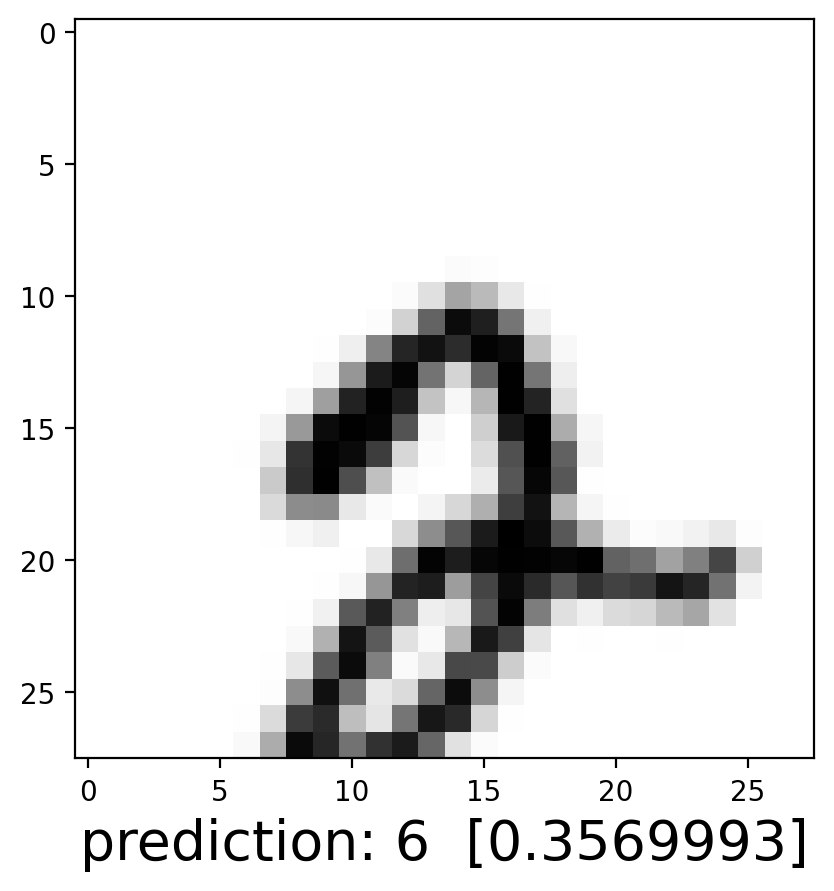

In [27]:
index = np.argmax(Y_prediction) # 10개의 class가 각 확률 값으로 나오기 때문에 가장 높은 값을 가진 인덱스를 추출 
value = Y_prediction[:, index]
plt.imshow(test_image, cmap='Greys')
plt.xlabel("prediction: "+str(index)+"  " +str(value), fontsize=20)
plt.show()